# Lab Instructions

You have been hired by James Cameron to create profiles of two characters for a reboot of the Titanic Movie: one that is most likely to survive the sinking and one that is least likely to survive.  Mr. Cameron wants this reboot to be as historically accurate as possible, so your profile of each character should be backed up with data and visualizations.

Each character profile should include information on their:
* Age, fare
* Sex
* Passenger class
* Travel companions (including both parents/children and siblings/spouse)
* Port of departure (indicated by the Embarked feature in the dataset)

For quantitative features like `Age` and `Fare`, you will need to use the `.loc` method we learned in class (or something similar) to place individuals in categories.  How you choose to do this is up to you, but make sure you explain your reasoning.

You should include at least one visualization for each element of the character profile (age, sex, passenger class, etc.) as evidence.

After you have developed your two character profiles, use your Pandas data wrangling skills to identify at least one real passenger in the dataset that fits each profile.  Print out the names of these individuals.  Look them up in [Encyclopeida Titanica](https://www.encyclopedia-titanica.org/) (or a similar resource).  

Tell Mr. Cameron at least one thing about the real passengers who fit your two character profiles that you learned from an external resource.  You need one interesting fact about a person who fits the profile of "most likely to survive" and one interesting fact about a person who fits the profile of "least likely to surivive".  



In [26]:
import pandas as pd

df = pd.read_csv('titanic_passengers.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


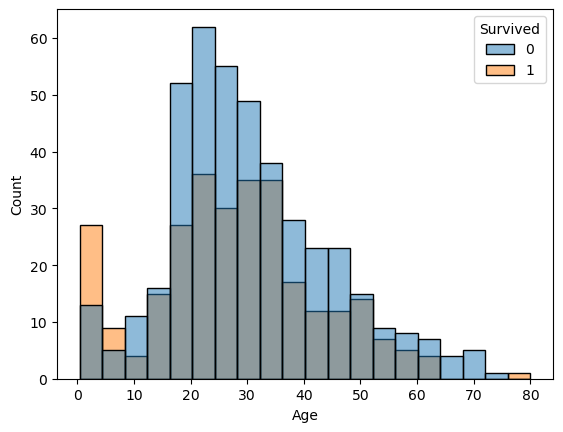

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x='Age', data=df, hue='Survived')

plt.show()

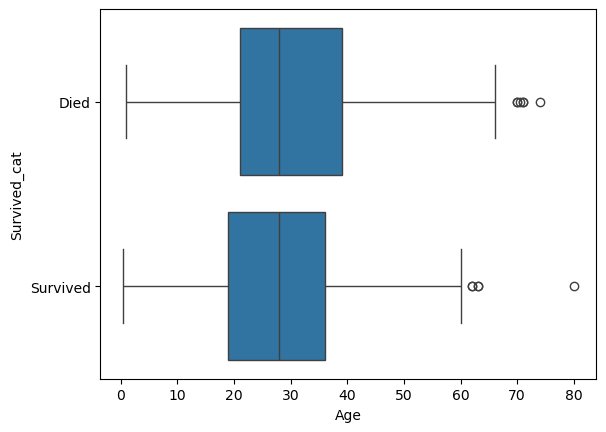

In [28]:
df.loc[df['Survived'] == 0, 'Survived_cat'] = 'Died'
df.loc[df['Survived'] == 1, 'Survived_cat'] = 'Survived'

sns.boxplot(x='Age', data=df, y='Survived_cat')
plt.show()

In [29]:
df['Survived'].dtype

dtype('int64')

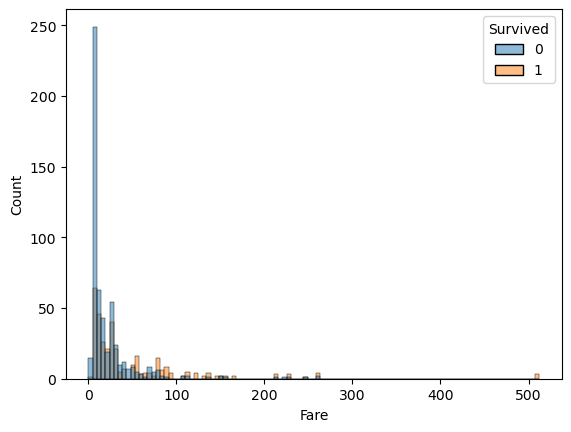

In [30]:
sns.histplot(x='Fare', data=df, hue='Survived')

plt.show()

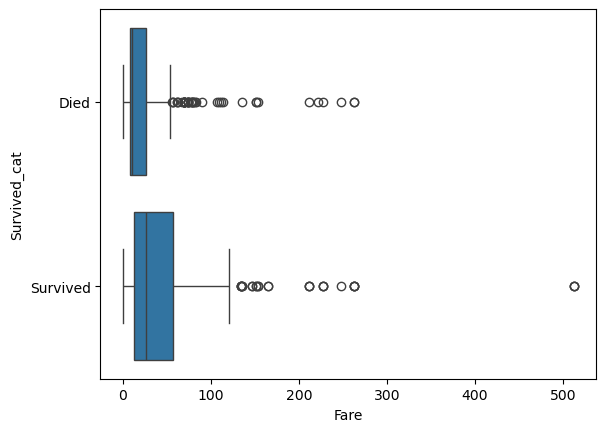

In [31]:
sns.boxplot(x='Fare', data=df, y='Survived_cat')

plt.show()

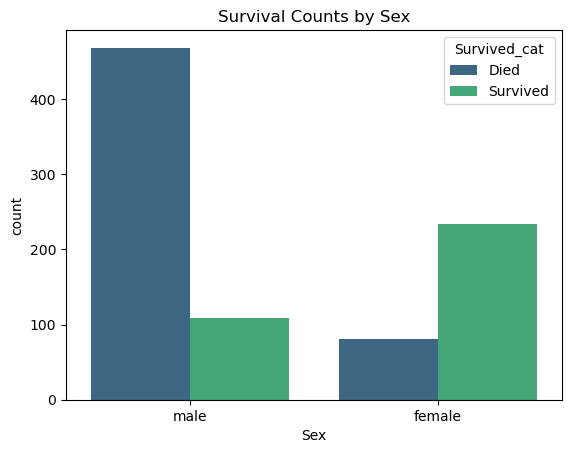

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load data and create readable 'Survived_cat' column
df = pd.read_csv('titanic_passengers.csv')
df['Survived_cat'] = df['Survived'].apply(lambda x: 'Survived' if x == 1 else 'Died')

# Plot
sns.countplot(x='Sex', data=df, hue='Survived_cat', palette='viridis')
plt.title('Survival Counts by Sex')
plt.show()

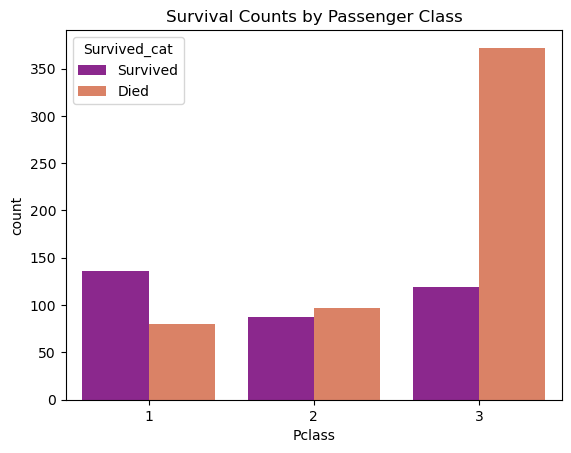

In [14]:
sns.countplot(x='Pclass', data=df, hue='Survived_cat', palette='plasma')
plt.title('Survival Counts by Passenger Class')
plt.show()

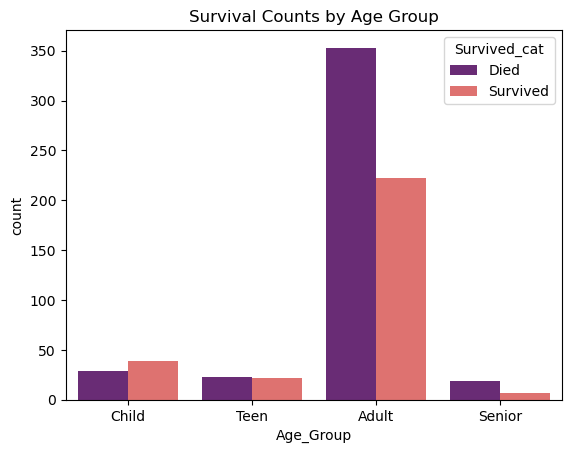

In [15]:
# Categorizing Age
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

#Plot
sns.countplot(x='Age_Group', data=df.sort_values(by='Age_Group'), hue='Survived_cat', palette='magma')
plt.title('Survival Counts by Age Group')
plt.show()

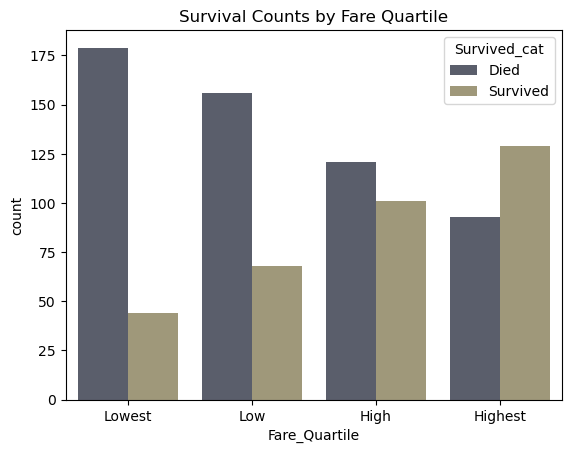

In [16]:
# Categorizing Fare
df['Fare_Quartile'] = pd.qcut(df['Fare'], 4, labels=['Lowest', 'Low', 'High', 'Highest'])

# Plot
sns.countplot(x='Fare_Quartile', data=df, hue='Survived_cat', palette='cividis')
plt.title('Survival Counts by Fare Quartile')
plt.show()

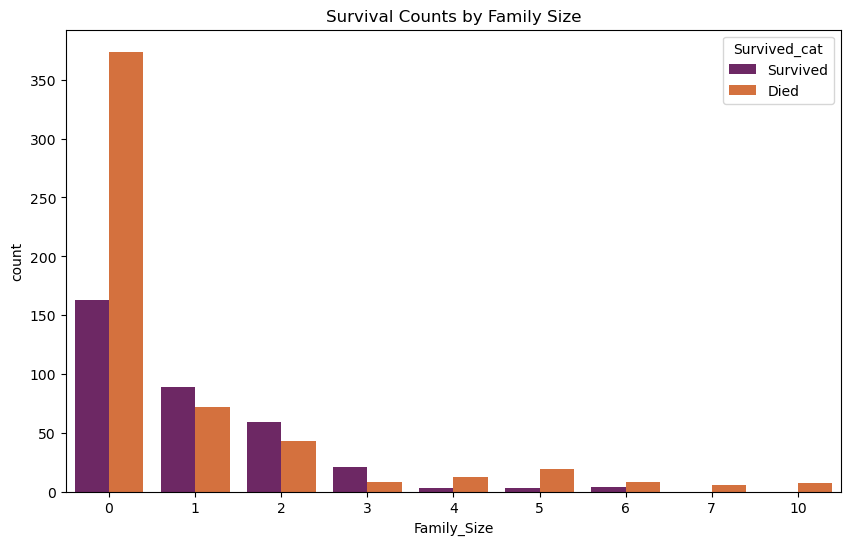

In [19]:
# Creating a Family_Size feature
df['Family_Size'] = df['SibSp'] + df['Parch']

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Family_Size', data=df, hue='Survived_cat', palette='inferno')
plt.title('Survival Counts by Family Size')
plt.show()

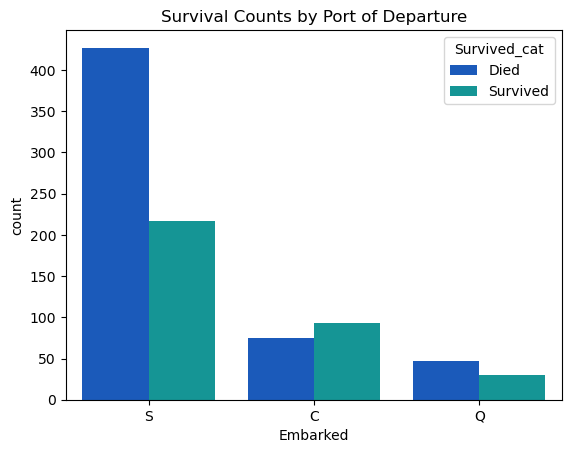

In [20]:
sns.countplot(x='Embarked', data=df, hue='Survived_cat', palette='winter')
plt.title('Survival Counts by Port of Departure')
plt.show()

In [39]:
# Create the 'Family_Size' column by adding SibSp and Parch
df['Family_Size'] = df['SibSp'] + df['Parch']

# Filter the DataFrame using .loc with multiple conditions
most_likely_to_survive = df.loc[
    (df['Sex'] == 'female') &
    (df['Pclass'] == 1) &
    (df['Age'] <= 18) &
    (df['Survived'] == 1) &
    (df['Embarked'] == 'C')
]

# Display the names of passengers who match
print(most_likely_to_survive[['Name', 'Age', 'Pclass', 'Sex', 'Embarked']])

                                                  Name   Age  Pclass     Sex  \
307  Penasco y Castellana, Mrs. Victor de Satode (M...  17.0       1  female   
311                         Ryerson, Miss. Emily Borie  18.0       1  female   
329                       Hippach, Miss. Jean Gertrude  16.0       1  female   
700  Astor, Mrs. John Jacob (Madeleine Talmadge Force)  18.0       1  female   

    Embarked  
307        C  
311        C  
329        C  
700        C  


In [46]:
least_likely_to_survive = df.loc[
    (df['Sex'] == 'male') &
    (df['Pclass'] == 3) &
    (df['Age'] >= 18) & (df['Age'] <= 60) & # Targeting the 'Adult' category
    (df['Family_Size'] == 0) & # Traveling alone
    (df['Embarked'] == 'S') &
    (df['Survived'] == 0)
]

print(least_likely_to_survive[['Name', 'Age', 'Pclass', 'Sex']].head())

                              Name   Age  Pclass   Sex
4         Allen, Mr. William Henry  35.0       3  male
12  Saundercock, Mr. William Henry  20.0       3  male
37        Cann, Mr. Ernest Charles  21.0       3  male
51    Nosworthy, Mr. Richard Cater  21.0       3  male
67        Crease, Mr. Ernest James  19.0       3  male


In [ ]:
## Profile 1: Most Likely to Survive

""" Jean Gertrude Isabelle Hippach, 16 yo, Female, First Class, Cherbourg, Survived, Travel Companion: Mother, Fare: £57

Quick Insight: A frequent traveller, Jean had been abroad in Europe with her mother since January 1912. For their return to America they boarded Titanic at Cherbourg as first-class 
passengers (ticket number 111361 which cost £57, 19s, 7d) and occupied cabin B18. They later claimed they had not wanted to board the ship, not trusting a maiden voyage, but White Star 
employees had told them that there was only one First Class cabin left, implying that everyone wanted to go on the ship. They felt lucky to get their ticket, only to discover that the 
ship was only partially full. "Everyone was saying Sunday evening that we were ahead of schedule and that we would break the records," Mrs Hippach later recalled.
        
        Sex: Female. The data shows an overwhelming comparison that women were far more likely
        to survive than men, which aligns with the "women and children" evacuation protocol.
        
        Passanger Class: 1st Class. Passangers in 1st class had a significantly higher survival rate than those in 
        2nd and 3rd class, indicating that wealth and status provided better access to lifeboats.

        Age: Child (0-12 years). Children had a higher priorty during the evacuation, resulting in a better survival 
        rate compared to other age groups.

        Fare: High (Top 25%). A higher fare is strongly correlated with being in 1st class and thus a higher 
        chance of survival.

        Travel Companions: Traveling with a small family (1-3 members). Passengers with
        new family members had a higher survival rate than those traveling alone or in very
        large families.

        Port of Departure: Cherbourg (C). Passengers who embarked at Cherbourg had a noticeably higher survival
        rate. This is likely due to a higher portion of 1st class passengers boarding there.
        
"""

## Profile 2: Least Likely to Survive 

""" William Henry Allen, 35 yo, Male, Third Class, Dead, Travel Companion: N/A, Fare: £8

Brief Insight: After staying with his parents for a short while at Albert Cottage, Pembury Road, Clapton, London, Allen boarded the Titanic as a third class passenger 
(ticket number 373450 which cost £8, 1s). He planned to get a job in the USA whilst staying with an uncle at 593 Eleventh Avenue, New York City. He was the best friend of steward 
George Hinckley. Hinckley, originally of Derby, had left his job at Birmingham Metal and Munitions Co. Ltd, Adderley Park, Birmingham. It is possible that the two men had worked together.
William Allen died in the Titanic disaster and his body was never recovered. His estate worth £167, 10s which administered to his widow on 5 April 1913. Florence Allen never remarried
and eventually resettled in Bridgford, Nottinghamshire. She passed away on 15 September 1965.
    
        Sex: Male. As seen in the first chart, men had a very low chance. This was due to the 
        "women and children" evacuation protocol.
    
        Passenger Class: 3rd Class. Being the lowest class on board meant having the most difficult 
        access to lifeboats.
    
        Age: Adult (18-60 years). Able-bodied adult men were the lowest priority during the evacuation
        leading to a grim survival rate for this group.

        Fare: Low (Bottom 25%). The lowest fares correspond to 3rd class tickets and the lowest chance of survival.

        Travel Companions: Traveling Alone. The data shows that men traveling alone had a particularly low
        survival rate.

        Port of Departue: Southhampton (S). The marjority of 3rd class passengers boarded at Southhampton, which had
        the lowest overall rate of survival among the 3 different ports.
"""